In [1]:
import pandas as pd

In [2]:
#read CCTV number
CCTV_Seoul = pd.read_csv('CCTV_in_Seoul.csv',  encoding='utf-8')

In [3]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [4]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [5]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [6]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [7]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                        CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [9]:
#read population data
pop_Seoul=pd.read_excel('seoul_population.xls', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2018.2/4,합계,4241547,10089517,4935944,5153573,9814049,4802769,5011280,275468,133175,142293,2.31,1393671
3,2018.2/4,종로구,73655,163569,79522,84047,153780,75247,78533,9789,4275,5514,2.09,26512
4,2018.2/4,중구,61091,135427,66673,68754,126032,62260,63772,9395,4413,4982,2.06,21798


In [10]:
#Sort Columns
pop_Seoul = pd.read_excel('seoul_population.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N',
                          encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798
3,용산구,245245,229677,15568,37331
4,성동구,316068,308066,8002,42171


In [11]:
#Rename columns
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10089517,9814049,275468,1393671
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798
3,용산구,245245,229677,15568,37331
4,성동구,316068,308066,8002,42171


In [12]:
#Adding ratio of Foreiner and Old
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10089517,9814049,275468,1393671,2.730240,13.813060
1,종로구,163569,153780,9789,26512,5.984630,16.208450
2,중구,135427,126032,9395,21798,6.937317,16.095756
3,용산구,245245,229677,15568,37331,6.347938,15.221921
4,성동구,316068,308066,8002,42171,2.531734,13.342382


In [13]:
pop_Seoul.drop([0],inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,163569,153780,9789,26512,5.984630,16.208450
2,중구,135427,126032,9395,21798,6.937317,16.095756
3,용산구,245245,229677,15568,37331,6.347938,15.221921
4,성동구,316068,308066,8002,42171,2.531734,13.342382
5,광진구,370519,355748,14771,44806,3.986570,12.092767


In [14]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
21,관악구,521960,504048,17912,71317,3.431681,13.663308
22,서초구,443989,439844,4145,54614,0.933582,12.300755
23,강남구,551888,546952,4936,66011,0.894384,11.960941
24,송파구,673161,666439,6722,79093,0.998572,11.749492
25,강동구,437050,432749,4301,57680,0.984098,13.197575


In [15]:
#Check the matrix size
pop_Seoul.shape

(25, 7)

In [16]:
#Check the matrix size
CCTV_Seoul.shape

(25, 7)

In [17]:
#Merge Two bodies Both of them are 25,7. No need to clean up
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,551888,546952,4936,66011,0.894384,11.960941
1,강동구,1010,379,99,155,377,166.490765,437050,432749,4301,57680,0.984098,13.197575
2,강북구,831,369,120,138,204,125.203252,326063,322385,3678,57401,1.128003,17.604267
3,강서구,911,388,258,184,81,134.793814,606981,600257,6724,78042,1.107778,12.857404
4,관악구,2109,846,260,390,613,149.290780,521960,504048,17912,71317,3.431681,13.663308


In [18]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941
1,강동구,1010,166.490765,437050,432749,4301,57680,0.984098,13.197575
2,강북구,831,125.203252,326063,322385,3678,57401,1.128003,17.604267
3,강서구,911,134.793814,606981,600257,6724,78042,1.107778,12.857404
4,관악구,2109,149.290780,521960,504048,17912,71317,3.431681,13.663308


In [19]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941
강동구,1010,166.490765,437050,432749,4301,57680,0.984098,13.197575
강북구,831,125.203252,326063,322385,3678,57401,1.128003,17.604267
강서구,911,134.793814,606981,600257,6724,78042,1.107778,12.857404
관악구,2109,149.290780,521960,504048,17912,71317,3.431681,13.663308


In [20]:
import platform
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

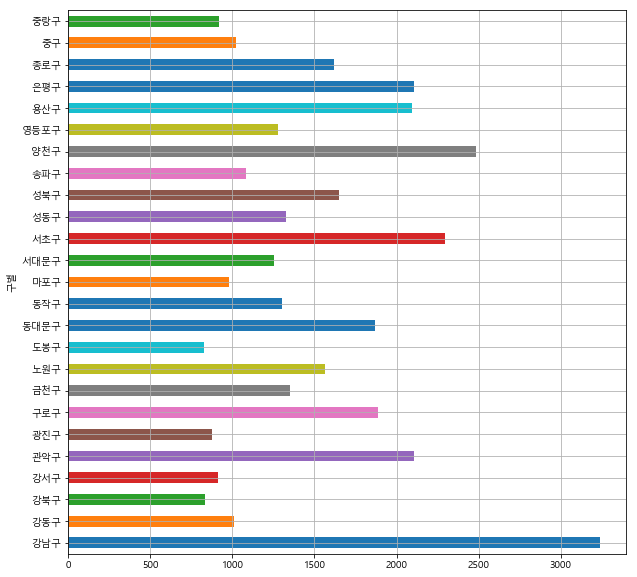

In [21]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

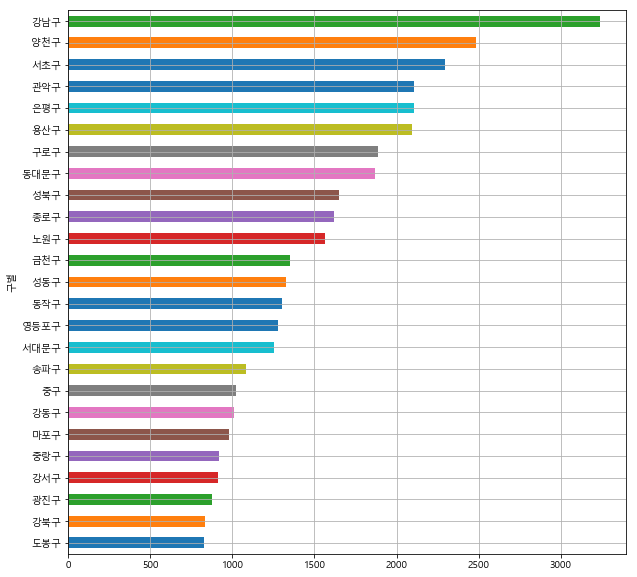

In [22]:
data_result['소계'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(10,10))
plt.show()

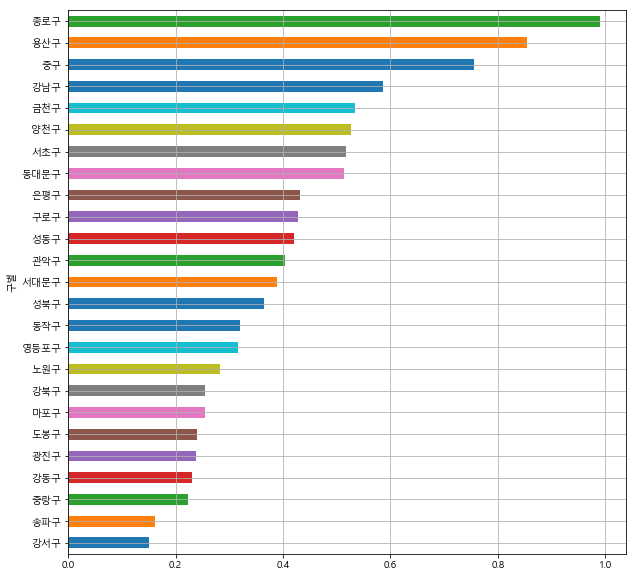

In [23]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()

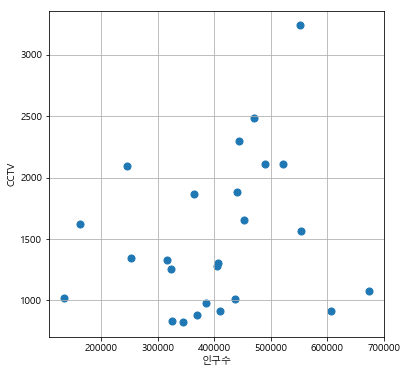

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [25]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.08389848e-03, 1.07787951e+03])

In [26]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

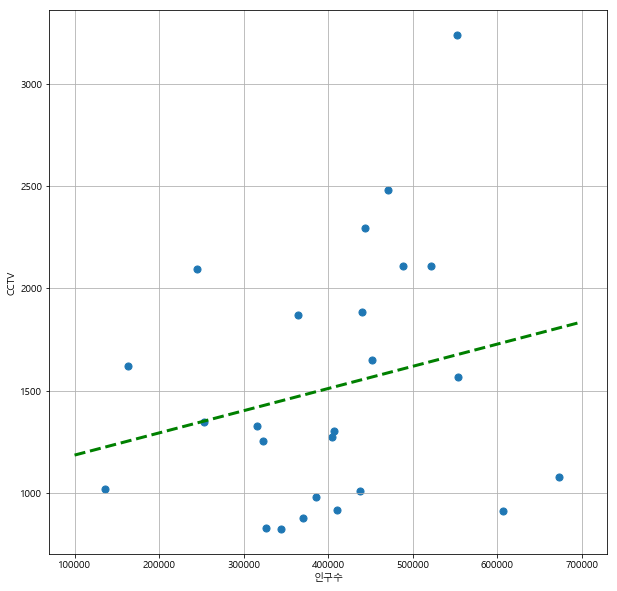

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [28]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,551888,546952,4936,66011,0.894384,11.960941,0.586713,1561.929921
양천구,2482,34.671731,471026,467151,3875,56742,0.822672,12.046469,0.526935,893.576120
강서구,911,134.793814,606981,600257,6724,78042,1.107778,12.857404,0.150087,824.785298
용산구,2096,53.216374,245245,229677,15568,37331,6.347938,15.221921,0.854656,752.299803
서초구,2297,63.371266,443989,439844,4145,54614,0.933582,12.300755,0.517355,737.881483


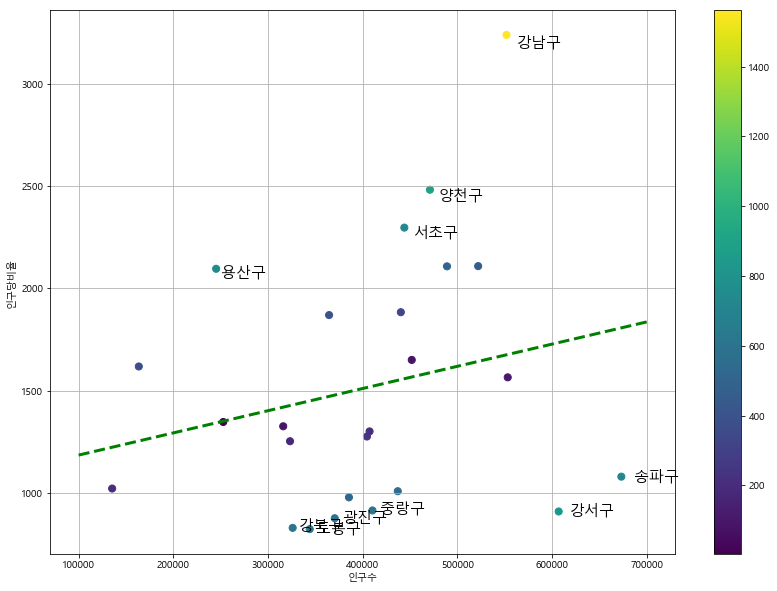

In [29]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()